In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import dc_stat_think as dcst
import seaborn as sns

In [10]:
#!pip install -U scikit-learn

In [11]:
from sklearn.linear_model import LinearRegression

In [132]:
import scipy

In [2]:
sns.set()

In [3]:
jpy = pd.read_csv("JPY.csv").Close
aud = pd.read_csv("AUD.csv").Close
jpy.iloc[295] = np.mean([jpy.iloc[294], jpy.iloc[296]])
aud.iloc[295] = np.mean([aud.iloc[294], aud.iloc[296]])

In [4]:
jpy1 = np.diff(jpy)/jpy[:-1]*100
aud1 = np.diff(aud)/aud[:-1]*100

In [5]:
port = 0.71*jpy + 0.29*aud
PORT = np.diff(port)/port[:-1]*100

In [6]:
port1 = 0.71*jpy1 + 0.29*aud1

In [107]:
djia = pd.read_csv("DJIA.csv")

In [108]:
djia.isnull().values.any()

False

In [109]:
djia = djia.iloc[:, 1].values

In [110]:
for i in range(len(djia)-1):
    if djia[i] == ".":
        djia[i] = np.mean([float(djia[i-1]), float(djia[i+1])])

In [114]:
for i in range(0,len(djia)):
    djia[i] = float(djia[i])

In [12]:
#https://realpython.com/linear-regression-in-python/

In [63]:
djia.shape

(1305,)

In [64]:
jpy1.shape

(1304,)

In [65]:
jpy1 = np.expand_dims(jpy1, axis=1)
aud1 = np.expand_dims(aud1, axis=1)

In [118]:
djia1 = np.diff(djia)/djia[:-1]*100

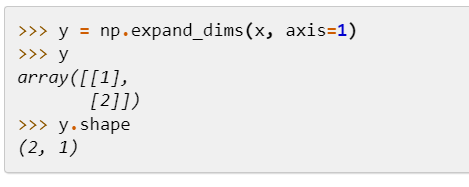

## Regresja

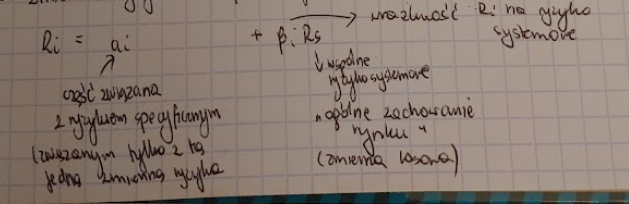

Czyli b0 to ai, b1 to Bi

## Dla JPY

In [121]:
model_jpy = LinearRegression().fit(jpy1, djia1)

In [123]:
#coefficient of determination, 𝑅²
r = model_jpy.score(jpy1,djia1)
r

0.00025281092311202347

In [140]:
corr, _ = scipy.stats.pearsonr(jpy1[:,0], djia1)
corr**2

0.00025281092311181806

In [141]:
#The attributes of model are .intercept_, which represents the coefficient 𝑏₀, and .coef_, which represents 𝑏₁:
b0 = model_jpy.intercept_
b1 = model_jpy.coef_
print(f"intercept b0: {model_jpy.intercept_}") 
print(f"slope b1: {model_jpy.coef_}")

intercept b0: 0.033971892245533784
slope b1: [-0.04094296]


In [127]:
y_pred = model_jpy.predict(jpy1)
print(f"predicted response:\n{y_pred}")

predicted response:
[0.02096978 0.02331186 0.03718454 ... 0.01467025 0.02948431 0.08248439]


In [182]:
y_pred = b0 + b1 * djia1
print(f"predicted response:\n{y_pred}")

predicted response:
[-0.006680331938087508 0.12961766155942261 0.026044278754646693 ...
 -0.017752827122186066 -0.00626459020571124 0.05819199161543817]


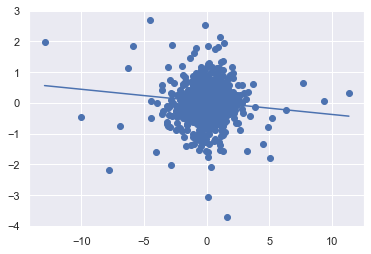

In [176]:
plt.scatter(djia1, jpy1)
plt.plot([min(djia1), max(djia1)], [b1 * min(djia1) + b0, b1 * max(djia1) + b0])

In [177]:
pr_regr_jpy = b0 + b1*jpy1
e = djia1-pr_regr_jpy
np.var(e)

1.7360329252958981

# Dla AUD

In [169]:
model_aud = LinearRegression().fit(aud1, djia1)

In [171]:
r = model_aud.score(aud1,djia1)
print(r)
corr, _ = scipy.stats.pearsonr(aud1[:,0], djia1)
corr**2

0.0013706390137071534


0.0013706390137067448

In [172]:
b0 = model_jpy.intercept_
b1 = model_jpy.coef_
print(b0)
print(b1)

0.033971892245533784
[-0.04094296]


In [174]:
y_pred = model_aud.intercept_ + model_aud.coef_ * aud1
print(f"predicted response:\n{y_pred}")

predicted response:
[[ 0.0705939 ]
 [-0.01582319]
 [ 0.04761731]
 ...
 [ 0.07204408]
 [-0.03034513]
 [ 0.13460847]]


In [175]:
pr_regr_aud = b0 + b1*aud1
e = djia1-pr_regr_aud
np.var(e)

1.736319639941777

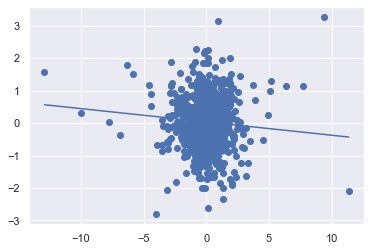

In [178]:
plt.scatter(djia1, aud1)
plt.plot([min(djia1), max(djia1)], [b1 * min(djia1) + b0, b1 * max(djia1) + b0])